In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
df = pd.read_csv("../data/UpdatedResumeDataSet.csv")

In [109]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [110]:
df.shape

(962, 2)

In [111]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

# Exploring Categories

In [112]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

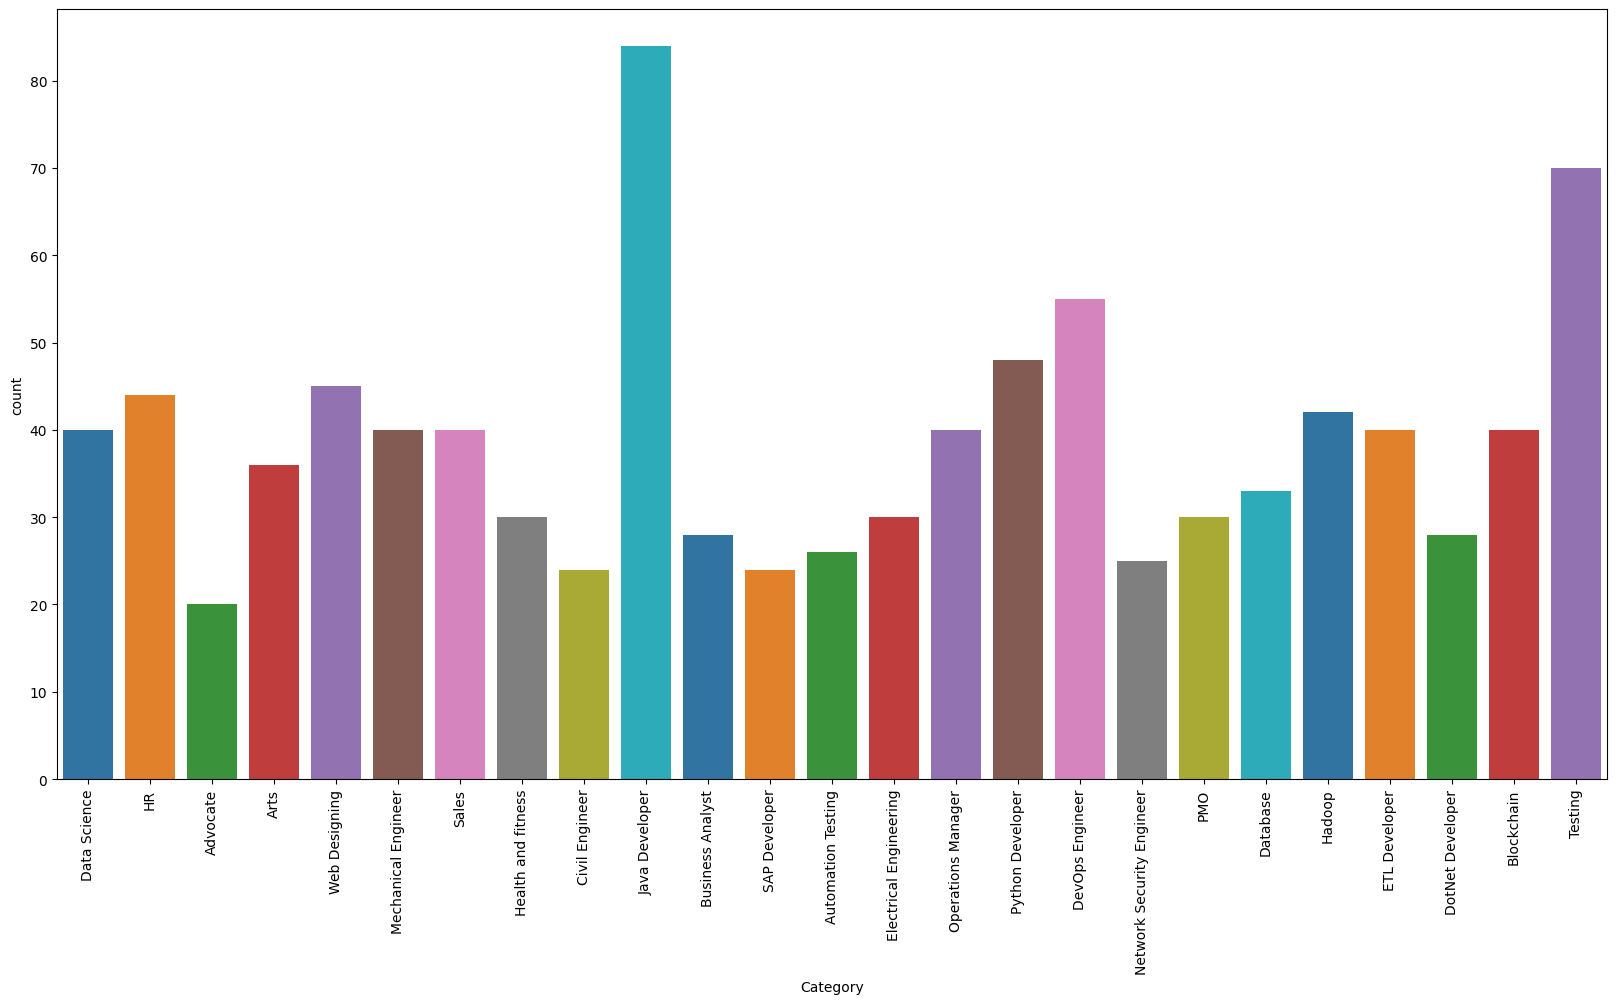

In [113]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Category', data=df, palette='tab10')
plt.xticks(rotation=90)
plt.show()

In [114]:
counts = df["Category"].value_counts()
labels = df["Category"].unique()

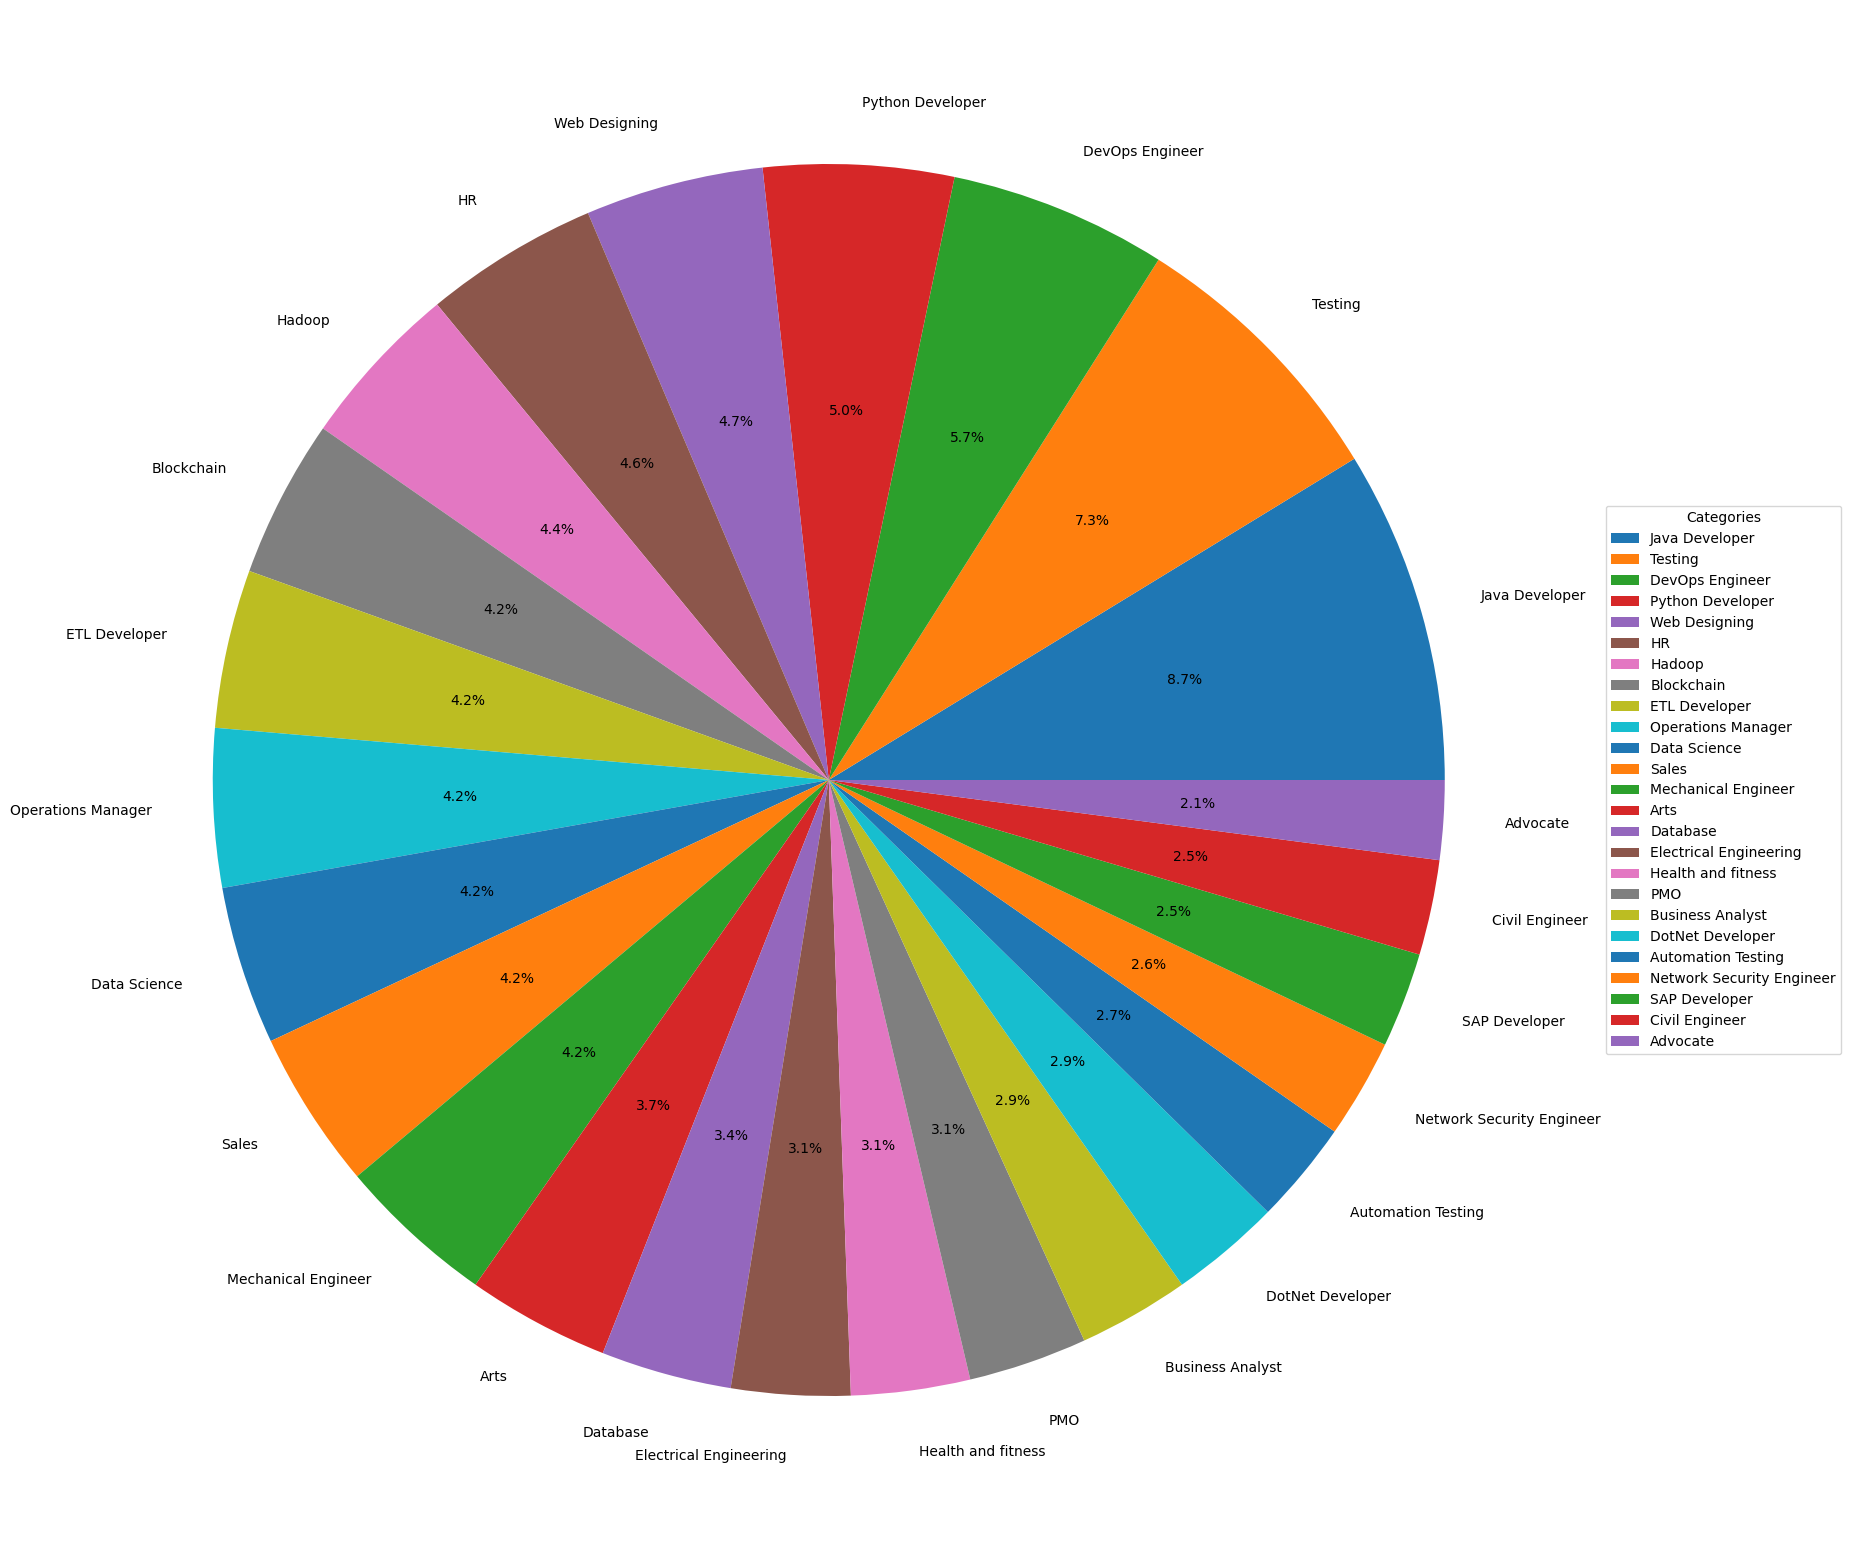

In [115]:
plt.figure(figsize=(25, 20))
colors = plt.cm.tab10.colors  # Use a colormap for colors
wedges, texts, autotexts = plt.pie(counts, labels=counts.index, colors=colors, autopct='%1.1f%%')
plt.legend(wedges, counts.index, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))# Adding a legend
plt.show()

# Exploring Resume

In [116]:
df["Category"][0], df["Resume"][0]

('Data Science',
 'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - 

# Cleaning Resume

1. URLs                                             
2. Hashtags                                             
3. Mentions                                                     
4. Special letters                                             
5. Punctuations                                           

In [117]:
import re

def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt) # http://web.com
    cleanText = re.sub('RT|cc', ' ', cleanText) # RT @user: This is an amazing tweet! cc @anotheruser
    cleanText = re.sub('#\S+\s', ' ', cleanText) # ## #### ###
    cleanText = re.sub('@\S+', '  ', cleanText) # @gmail.com
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText) # Punctuation
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) # Café, jalapeño, résumé
    cleanText = re.sub('\s+', ' ', cleanText) # This   is   a    test.
    
    return cleanText

In [118]:
# Apply
df["cleaned Resume"] = df["Resume"].apply(lambda x: cleanResume(x))

In [119]:
df["cleaned Resume"]

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to a ept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: cleaned Resume, Length: 962, dtype: object

# Label-encoding for Categories

In [120]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [121]:
le.fit(df["Category"])
df["labeled Category"] = le.transform(df["Category"])

In [122]:
df["labeled Category"].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [123]:
# Create a mapping of label names to their corresponding numbers
label_mapping = {name: label for name, label in zip(le.classes_, range(len(le.classes_)))}

# Print the label names and their corresponding numbers
print(label_mapping)

{'Advocate': 0, 'Arts': 1, 'Automation Testing': 2, 'Blockchain': 3, 'Business Analyst': 4, 'Civil Engineer': 5, 'Data Science': 6, 'Database': 7, 'DevOps Engineer': 8, 'DotNet Developer': 9, 'ETL Developer': 10, 'Electrical Engineering': 11, 'HR': 12, 'Hadoop': 13, 'Health and fitness': 14, 'Java Developer': 15, 'Mechanical Engineer': 16, 'Network Security Engineer': 17, 'Operations Manager': 18, 'PMO': 19, 'Python Developer': 20, 'SAP Developer': 21, 'Sales': 22, 'Testing': 23, 'Web Designing': 24}


# Vactorization

In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = "english")

X = tfidf.fit_transform(df["cleaned Resume"])

In [125]:
X

<962x7351 sparse matrix of type '<class 'numpy.float64'>'
	with 164261 stored elements in Compressed Sparse Row format>

In [126]:
y = df["labeled Category"]
y

0       6
1       6
2       6
3       6
4       6
       ..
957    23
958    23
959    23
960    23
961    23
Name: labeled Category, Length: 962, dtype: int32

# Splitting

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [128]:
X_train.shape, X_test.shape

((644, 7351), (318, 7351))

# Train model

In [129]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate

In [131]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))

[[ 7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0
   0]
 [ 0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   1]
 [ 0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 18

In [132]:
# Print a classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        14
           6       1.00      0.83      0.91        12
           7       1.00      1.00      1.00         9
           8       1.00      0.90      0.95        21
           9       1.00      1.00      1.00        11
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        18
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        13
          17       1.00    

In [133]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.9874213836477987


# Test

In [134]:
'''import pickle
pickle.dump(tfidfd,open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))

# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))
'''

"import pickle\npickle.dump(tfidfd,open('tfidf.pkl','wb'))\npickle.dump(clf, open('clf.pkl', 'wb'))\n"

In [135]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

In [139]:
# Clean the input resume
cleaned_resume = cleanResume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
inverted_mapping = {label: name for name, label in label_mapping.items()}

category_mapping = inverted_mapping

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)


Predicted Category: Data Science
6
